# Understanding Descriptive Statistics

Import the necessary libraries here:

In [310]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [372]:
def dice_throw(n):
    return pd.DataFrame(np.array([random.choice(np.arange(1, 7, 1)) for i in range(n)]))

#### 2.- Plot the results sorted by value.

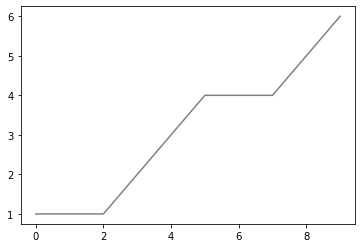

In [421]:
dice = dice_throw(10).sort_values(by=0).reset_index()[0]

# plot ??? like a line ??? OK.
plt.plot(range(len(dice)), dice, color= 'gray')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([3., 1., 1., 3., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

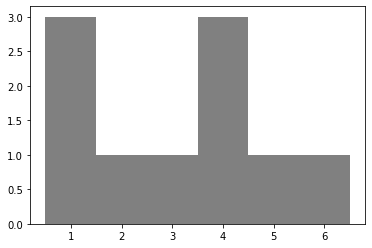

In [470]:
plt.hist(dice, bins= 6, range=(0.5, 6.5), color= 'gray')

In [314]:
"""
These plots are kind of inverted. The number of occurrences of each number in the first plot is coded in the x-axis,
while on the histogram the number of times a number results on the die is on the Y.

"""

'\nThese plots are kind of inverted. The number of occurrences of each number in the first plot is coded in the x-axis,\nwhile on the histogram the number of times a number results on the die is on the Y.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [315]:
def average(data):
    return sum(data)/len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [316]:
def freq(vals):
   
    freq_dist = {}
    for x in vals:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
            
    return freq_dist, sum([k*v for k, v in freq_dist.items()])/sum([v for k, v in freq_dist.items()])

freq_dist, mean_from_freq = freq(dice)

print(mean_from_freq)
print(np.mean(dice))

3.67
3.67


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [506]:
def median(val):
    
    """
    Input: list of values
    Ouput: median value of input list
    """
    
    if len(val) % 2 == 0:
        return sum(val[int(len(val)/2)-1:int(len(val)/2)+1])/2
    
    else:
        return val[int(len(val)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [560]:
def quartiles(vals):
    
    half = median(vals)
    
    if len(vals) % 2 == 0:
        first_quartile = median(vals[:int(len(vals)/2)])
        third_quartile = median(vals[int(len(vals)/2):])
    
    else:
        first_quartile = median(vals[:int(len(vals)/2)-1])
        third_quartile = median(vals[int(len(vals)/2)+1:])
    
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

(array([12., 17., 14., 22., 12., 23.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

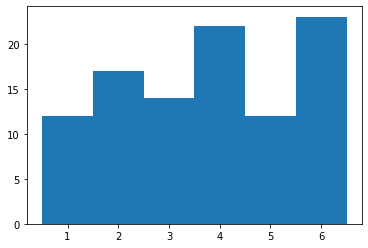

In [484]:
dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_values = sorted(dice_df['value'])
plt.hist(dice_values, bins=6, range= (0.5, 6.5))

In [319]:
"""What do I see? I don't get it... I see a distribution... That is random... 
The only thing I see is: Uno Dos Tres Quatro Cinco Cinco Seis"""

"\nWhat do I see? I don't get it... I see a distribution... That is random...\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [434]:
# did this just to check my functions
dice_df.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


In [553]:
print(average(dice_values))
print(quartiles(dice_values))

3.74
(4.0, 2.0, 5.0)


#### 3.- Now, calculate the frequency distribution.


In [371]:
freq_dist = freq(dice_values)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

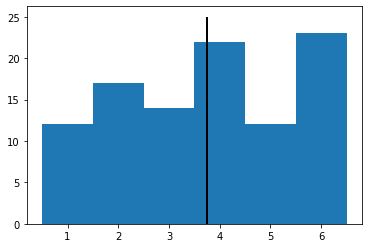

In [472]:
plt.hist(dice_values, bins=6, range= (0.5, 6.5))
plt.vlines(dice_df['value'].mean(), ymin=0, ymax=25, lw=2)

In [413]:
"""I just added it to the plot. It's supposed to be ~3.5 but it is 3.74 because the values are slightly left skewed."""

"I just added it to the plot. It's supposed to be ~3.5 but it is 3.74 because the values are slightly left skewed."

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175., 167., 175., 168., 149., 166.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

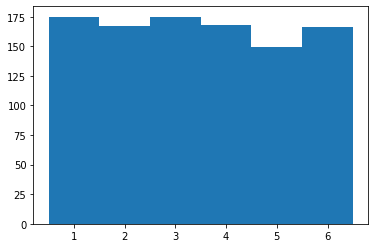

In [471]:
thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.hist(thousand['value'], bins= 6, range= (0.5, 6.5))

In [401]:
"""Yeah it's pretty close to a uniform distribution, meaning that pretty much every value happens 
the same number of times. It is less noisy because we increased the samples to the point where the probabilities are
essentially true."""

"\nYeah it's pretty close to a uniform distribution, meaning that pretty much every value happens \nthe same number of times. It is less noisy because we increased the samples to the point where the probabilities are\n"

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280B505F108>]],
      dtype=object)

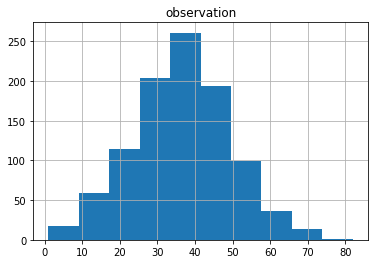

In [405]:
ages1 = pd.read_csv('../data/ages_population.csv')
ages1.hist()

In [406]:
'''I think the mean will be between 30-40 and the standard deviation around 20'''

'I think the mean will be between 30-40 and the standard deviation around 20'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [474]:
print(ages1.observation.mean())
print(ages1.observation.std())

36.56
12.816499625976762


In [573]:
print(quartiles(ages1.observation.sort_values()))
ages1.describe()

(28.0, 37.0, 45.0)


,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [475]:
"""My guess for the mean was right but I overestimated the STDEV"""

'My guess for the mean was right but I overestimated the STDEV'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280BAD77488>]],
      dtype=object)

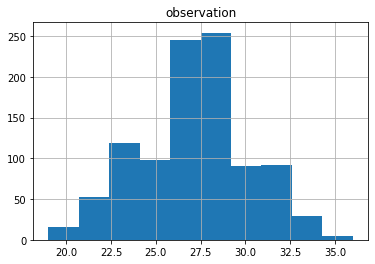

In [424]:
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [425]:
"""Yes this distribution is significantly narrower than the first one. Ages go from ~19 to ~36
On the previous one was from 0 to ~80"""

'Yes this distribution is significantly narrower than the first one. Ages go from ~19 to ~36\nOn the previous one was from 0 to ~80'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [476]:
print(ages2.observation.mean())
print(ages2.observation.std())

27.155
2.969813932689186


In [575]:
print(quartiles(ages2.observation.sort_values()))
ages2.describe()

(25.0, 27.0, 29.0)


,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [416]:
"""I think this distribution is very strange, a mean of 27 and stdev of 3 to me suggests that in this neightborhood 
they only gave this poll to university students or something like that"""

'I think this distribution is very strange, a mean of 27 and stdev of 3 to me suggests that in this neightborhood\nthey only gave this poll to university students or something like that'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280BB007EC8>]],
      dtype=object)

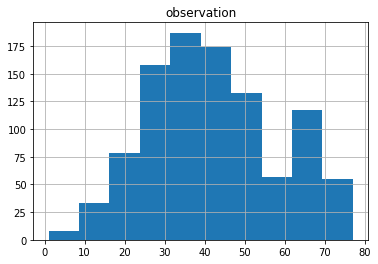

In [460]:
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [477]:
print(ages3.observation.mean())
print(ages3.observation.std())

41.989
16.144705959865934


In [431]:
"""This one is different because there is like a 'second' bump in the distribution centered at 60
This is making the average get a little higher and increases the STDEV"""

"This one is different because there is like a 'second' bump in the distribution centered at 60\nThis is making the average get a little higher and increases the STDEV"

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [497]:
print(ages3.observation.quantile(.25))
print(ages3.observation.quantile(.5))
print(ages3.observation.quantile(.75))

30.0
40.0
53.0


In [462]:
"""
There's a small difference between the mean and median, 
I think it's because the third quartile is larger than the first
"""

"\nThere's a small difference between the mean and median, I think it's because the third quartile is larger than the first\n"

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [339]:
"""
I think already the quartiles explain pretty well already, but we could possibly calculate other percentiles
to narrow down in which part of the distribution is the main difference
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [340]:
# your code here

In [341]:
"""
your comments here
"""

'\nyour comments here\n'